In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

In [5]:
data =np.array([["Apocalipse_1", "'revelation', 'jesus', 'christ', ',', 'god', 'gave', ',', 'show', 'servants', 'things', 'must', 'shortly', 'come', 'pass', ';', 'sent', 'signified', 'angel', 'servant', 'john', ':', 'bore', 'record', 'word', 'god', ',', 'testimony', 'jesus', 'christ', ',', 'things', 'saw.blessed', 'reads', ',', 'hear', 'words', 'prophecy', ',', 'keep', 'things', 'written', 'therein', ':', 'time', 'hand.john', 'seven', 'churches', 'asia', ':', 'grace', ',', 'peace', ',', ',', ',', 'come', ';', 'seven', 'spirits', 'throne', ';', 'jesus', 'christ', ',', 'faithful', 'witness', ',', 'first', 'begotten', 'dead', ',', 'prince', 'kings', 'earth', '.', 'loved', 'us', ',', 'washed', 'us', 'sins', 'blood', ',', 'made', 'us', 'kings', 'priests', 'god', 'father', ';', 'glory', 'dominion', 'ever', 'ever', '.', 'amen.behold', ',', 'comes', 'clouds', ';', 'every', 'eye', 'shall', 'see', ',', 'also', 'pierced', ':', 'kindreds', 'earth', 'shall', 'wail', '.', 'even', ',', 'amen.i', 'alpha', 'omega', ',', 'beginning', 'ending', ',', 'said', 'lord', ',', ',', ',', 'come', ',', 'almighty.i', 'john', ',', 'also', 'brother', ',', 'companion', 'tribulation', ',', 'kingdom', 'patience', 'jesus', 'christ', ',', 'isle', 'called', 'patmos', ',', 'word', 'god', ',', 'testimony', 'jesus', 'christ.i', 'spirit', 'lord', ', 'day', ',', 'heard', 'behind', 'great', 'voice', ',', 'trumpet', ',', 'saying', ',', 'alpha', 'omega', ',', 'first', 'last', ':', ',', 'see', ',', 'write', 'book', ',', 'send', 'seven', 'churches', 'asia', ';', 'ephesus', ',', 'smyrna', ',', 'pergamos', ',', 'thyatira', ',', 'sardis', ',', 'philadelphia', ',', 'laodicea.and', 'turned', 'see', 'voice', 'spoke', '.', 'turned', ',', 'saw', 'seven', 'golden', 'candlesticks', ';', 'middle', 'seven', 'candlesticks', 'one', 'like', 'son', 'man', ',', 'clothed', 'garment', 'foot', ',', 'girt', 'breasts', 'golden', 'girdle.his', 'head', 'hairs', 'white', 'like', 'wool', ',', 'white', 'snow', ';', 'eyes', 'flame', 'fire', ';', 'feet', 'like', 'fine', 'brass', ',', 'burned', 'furnace', ';', 'voice', 'sound', 'many', 'waters.and', 'right', 'hand', 'seven', 'stars', ':', 'mouth', 'went', 'sharp', 'two', 'edged', 'sword', ':', 'countenance', 'sun', 'shines', 'strength.and', 'saw', ',', 'fell', 'feet', 'dead', '.', 'laid', 'right', 'hand', ',', 'saying', ',', 'fear', ';', 'first', 'last', ':', 'lives', ',', 'dead', ';', ',', 'behold', ',', 'alive', 'ever', ',', 'amen', ';', 'keys', 'hell', 'death.write', 'things', 'seen', ',', 'things', ',', 'things', 'shall', 'hereafter', ';', 'mystery', 'seven', 'stars', 'saw', 'right', 'hand', ',', 'seven', 'golden', 'candlesticks', '.', 'seven', 'stars', 'angels', 'seven', 'churches', ':', 'seven', 'candlesticks', 'saw', 'seven', 'churches', '.'"],
               ["Apocalipse_2", "'angel', 'church', 'ephesus', 'write', ';', 'things', 'said', 'holds', 'seven', 'stars', 'right', 'hand', ',', 'walks', 'middle', 'seven', 'golden', 'candlesticks', ';', 'know', 'works', ',', 'labor', ',', 'patience', ',', 'bear', 'evil', ':', 'tried', 'say', 'apostles', ',', ',', 'found', 'liars', ':', 'borne', ',', 'patience', ',', 'name', ', 'sake', 'labored', ',', 'fainted.nevertheless', 'somewhat', ',', 'left', 'first', 'love.remember', 'therefore', 'fallen', ',', 'repent', ',', 'first', 'works', ';', 'else', 'come', 'quickly', ',', 'remove', 'candlestick', 'place', ',', 'except', 'repent.but', ',', 'hate', 'deeds', 'nicolaitanes', ',', 'also', 'hate.he', 'ear', ',', 'let', 'hear', 'spirit', 'said', 'churches', ';', 'overcomes', 'give', 'eat', 'tree', 'life', ',', 'middle', 'paradise', 'god.and', 'angel', 'church', 'smyrna', 'write', ';', 'things', 'said', 'first', 'last', ',', 'dead', ',', 'alive', ';', 'know', 'works', ',', 'tribulation', ',', 'poverty', ',', '(', 'rich', ')', 'know', 'blasphemy', 'say', 'jews', ',', ',', 'synagogue', 'satan.fear', 'none', 'things', 'shall', 'suffer', ':', 'behold', ',', 'devil', 'shall', 'cast', 'prison', ',', 'may', 'tried', ';', 'shall', 'tribulation', 'ten', 'days', ':', 'faithful', 'death', ',', 'give', 'crown', 'life.he', 'ear', ',', 'let', 'hear', 'spirit', 'said', 'churches', ';', 'overcomes', 'shall', 'hurt', 'second', 'death.and', 'angel', 'church', 'pergamos', 'write', ';', 'things', 'said', 'sharp', 'sword', 'two', 'edges', ';', 'know', 'works', ',', 'dwell', ',', 'even', 'satan', ', 'seat', ':', 'hold', 'fast', 'name', ',', 'denied', 'faith', ',', 'even', 'days', 'wherein', 'antipas', 'faithful', 'martyr', ',', 'slain', 'among', ',', 'satan', 'dwells.but', 'things', ',', 'hold', 'doctrine', 'balaam', ',', 'taught', 'balac', 'cast', 'stumbling', 'block', 'children', 'israel', ',', 'eat', 'things', 'sacrificed', 'idols', ',', 'commit', 'fornication.so', 'also', 'hold', 'doctrine', 'nicolaitanes', ',', 'thing', 'hate.repent', ';', 'else', 'come', 'quickly', ',', 'fight', 'sword', 'mouth.he', 'ear', ',', 'let', 'hear', 'spirit', 'said', 'churches', ';', 'overcomes', 'give', 'eat', 'hidden', 'manna', ',', 'give', 'white', 'stone', ',', 'stone', 'new', 'name', 'written', ',', 'man', 'knows', 'saving', 'receives', 'it.and', 'angel', 'church', 'thyatira', 'write', ';', 'things', 'said', 'son', 'god', ',', 'eyes', 'like', 'flame', 'fire', ',', 'feet', 'like', 'fine', 'brass', ';', 'know', 'works', ',', 'charity', ',', 'service', ',', 'faith', ',', 'patience', ',', 'works', ';', 'last', 'first.notwithstanding', 'things', ',', 'suffer', 'woman', 'jezebel', ',', 'calls', 'prophetess', ',', 'teach', 'seduce', 'servants', 'commit', 'fornication', ',', 'eat', 'things', 'sacrificed', 'idols.and', 'gave', 'space', 'repent', 'fornication', ';', 'repented', 'not.behold', ',', 'cast', 'bed', ',', 'commit', 'adultery', 'great', 'tribulation', ',', 'except', 'repent', 'deeds.and', 'kill', 'children', 'death', ';', 'churches', 'shall', 'know', 'searches', 'reins', 'hearts', ':', 'give', 'every', 'one', 'according', 'works.but', 'say', ',', 'rest', 'thyatira', ',', 'many', 'doctrine', ',', 'known', 'depths', 'satan', ',', 'speak', ';', 'put', 'none', 'burden.but', 'already', 'hold', 'fast', 'till', 'come.and', 'overcomes', ',', 'keeps', 'works', 'end', ',', 'give', 'power', 'nations', ':', 'shall', 'rule', 'rod', 'iron', ';', 'vessels', 'potter', 'shall', 'broken', 'shivers', ':', 'even', 'received', 'father.and', 'give', 'morning', 'star.he', 'ear', ',', 'let', 'hear', 'spirit', 'said', 'churches', '.'"],
               ["Apocalipse_3", "'angel', 'church', 'sardis', 'write', ';', 'things', 'said', 'seven', 'spirits', 'god', ',', 'seven', 'stars', ';', 'know', 'works', ',', 'name', 'live', ',', 'dead.be', 'watchful', ',', 'strengthen', 'things', 'remain', ',', 'ready', 'die', ':', 'found', 'works', 'perfect', 'god.remember', 'therefore', 'received', 'heard', ',', 'hold', 'fast', ',', 'repent', '.', 'therefore', 'shall', 'watch', ',', 'come', 'thief', ',', 'shall', 'know', 'hour', 'come', 'you.you', 'names', 'even', 'sardis', 'defiled', 'garments', ';', 'shall', 'walk', 'white', ':', 'worthy.he', 'overcomes', ',', 'shall', 'clothed', 'white', 'raiment', ';', 'blot', 'name', 'book', 'life', ',', 'confess', 'name', 'father', ',', 'angels.he', 'ear', ',', 'let', 'hear', 'spirit', 'said', 'churches.and', 'angel', 'church', 'philadelphia', 'write', ';', 'things', 'said', 'holy', ',', 'true', ',', 'key', 'david', ',', 'opens', ',', 'man', 'shuts', ';', 'shuts', ',', 'man', 'opens', ';', 'know', 'works', ':', 'behold', ',', 'set', 'open', 'door', ',', 'man', 'shut', ':', 'little', 'strength', ',', 'kept', 'word', ',', 'denied', 'name.behold', ',', 'make', 'synagogue', 'satan', ',', 'say', 'jews', ',', ',', 'lie', ';', 'behold', ',', 'make', 'come', 'worship', 'feet', ',', 'know', 'loved', 'you.because', 'kept', 'word', 'patience', ',', 'also', 'keep', 'hour', 'temptation', ',', 'shall', 'come', 'world', ',', 'try', 'dwell', 'earth.behold', ',', 'come', 'quickly', ':', 'hold', 'fast', ',', 'man', 'take', 'crown.him', 'overcomes', 'make', 'pillar', 'temple', 'god', ',', 'shall', 'go', ':', 'write', 'name', 'god', ',', 'name', 'city', 'god', ',', 'new', 'jerusalem', ',', 'comes', 'heaven', 'god', ':', 'write', 'new', 'name.he', 'ear', ',', 'let', 'hear', 'spirit', 'said', 'churches.and', 'angel', 'church', 'laodiceans', 'write', ';', 'things', 'said', 'amen', ',', 'faithful', 'true', 'witness', ',', 'beginning', 'creation', 'god', ';', 'know', 'works', ',', 'neither', 'cold', 'hot', ':', 'would', 'cold', 'hot.so', 'lukewarm', ',', 'neither', 'cold', 'hot', ',', 'spew', 'mouth.because', 'say', ',', 'rich', ',', 'increased', 'goods', ',', 'need', 'nothing', ';', 'know', 'wretched', ',', 'miserable', ',', 'poor', ',', 'blind', ',', 'naked', ':', 'counsel', 'buy', 'gold', 'tried', 'fire', ',', 'may', 'rich', ';', 'white', 'raiment', ',', 'may', 'clothed', ',', 'shame', 'nakedness', 'appear', ';', 'anoint', 'eyes', 'eye', 'salve', ',', 'may', 'see.as', 'many', 'love', ',', 'rebuke', 'chasten', ':', 'zealous', 'therefore', ',', 'repent.behold', ',', 'stand', 'door', ',', 'knock', ':', 'man', 'hear', 'voice', ',', 'open', 'door', ',', 'come', ',', 'sup', ',', 'me.to', 'overcomes', 'grant', 'sit', 'throne', ',', 'even', 'also', 'overcame', ',', 'set', 'father', 'throne.he', 'ear', ',', 'let', 'hear', 'spirit', 'said', 'churches', '.'"],
               ["Apocalipse_4", "'looked', ',', ',', 'behold', ',', 'door', 'opened', 'heaven', ':', 'first', 'voice', 'heard', 'trumpet', 'talking', ';', 'said', ',', 'come', ',', 'show', 'things', 'must', 'hereafter.and', 'immediately', 'spirit', ':', ',', 'behold', ',', 'throne', 'set', 'heaven', ',', 'one', 'sat', 'throne.and', 'sat', 'look', 'like', 'jasper', 'sardine', 'stone', ':', 'rainbow', 'round', 'throne', ',', 'sight', 'like', 'emerald.and', 'round', 'throne', 'four', 'twenty', 'seats', ':', 'seats', 'saw', 'four', 'twenty', 'elders', 'sitting', ',', 'clothed', 'white', 'raiment', ';', 'heads', 'crowns', 'gold.and', 'throne', 'proceeded', 'lightning', 'thunder', 'voices', ':', 'seven', 'lamps', 'fire', 'burning', 'throne', ',', 'seven', 'spirits', 'god.and', 'throne', 'sea', 'glass', 'like', 'crystal', ':', 'middle', 'throne', ',', 'round', 'throne', ',', 'four', 'beasts', 'full', 'eyes', 'behind.and', 'first', 'beast', 'like', 'lion', ',', 'second', 'beast', 'like', 'calf', ',', 'third', 'beast', 'face', 'man', ',', 'fourth', 'beast', 'like', 'flying', 'eagle.and', 'four', 'beasts', 'six', 'wings', ';', 'full', 'eyes', 'within', ':', 'rest', 'day', 'night', ',', 'saying', ',', 'holy', ',', 'holy', ',', 'holy', ',', 'lord', 'god', 'almighty', ',', ',', ',', 'come.and', 'beasts', 'give', 'glory', 'honor', 'thanks', 'sat', 'throne', ',', 'lives', 'ever', 'ever', ',', 'four', 'twenty', 'elders', 'fall', 'sat', 'throne', ',', 'worship', 'lives', 'ever', 'ever', ',', 'cast', 'crowns', 'throne', ',', 'saying', ',', 'worthy', ',', 'lord', ',', 'receive', 'glory', 'honor', 'power', ':', 'created', 'things', ',', 'pleasure', 'created', '.'"],
               ["Apocalipse_5", "'saw', 'right', 'hand', 'sat', 'throne', 'book', 'written', 'within', 'backside', ',', 'sealed', 'seven', 'seals.and', 'saw', 'strong', 'angel', 'proclaiming', 'loud', 'voice', ',', 'worthy', 'open', 'book', ',', 'loose', 'seals', 'thereof', '?', 'man', 'heaven', ',', 'earth', ',', 'neither', 'earth', ',', 'able', 'open', 'book', ',', 'neither', 'look', 'thereon.and', 'wept', 'much', ',', 'man', 'found', 'worthy', 'open', 'read', 'book', ',', 'neither', 'look', 'thereon.and', 'one', 'elders', 'said', ',', 'weep', ':', 'behold', ',', 'lion', 'tribe', 'juda', ',', 'root', 'david', ',', 'prevailed', 'open', 'book', ',', 'loose', 'seven', 'seals', 'thereof.and', 'beheld', ',', ',', 'see', ',', 'middle', 'throne', 'four', 'beasts', ',', 'middle', 'elders', ',', 'stood', 'lamb', 'slain', ',', 'seven', 'horns', 'seven', 'eyes', ',', 'seven', 'spirits', 'god', 'sent', 'forth', 'earth.and', 'came', 'took', 'book', 'right', 'hand', 'sat', 'throne.and', 'taken', 'book', ',', 'four', 'beasts', 'four', 'twenty', 'elders', 'fell', 'lamb', ',', 'every', 'one', 'harps', ',', 'golden', 'vials', 'full', 'odors', ',', 'prayers', 'saints.and', 'sung', 'new', 'song', ',', 'saying', ',', 'worthy', 'take', 'book', ',', 'open', 'seals', 'thereof', ':', 'slain', ',', 'redeemed', 'us', 'god', 'blood', 'every', 'kindred', ',', 'tongue', ',', 'people', ',', 'nation', ';', 'made', 'us', 'god', 'kings', 'priests', ':', 'shall', 'reign', 'earth.and', 'beheld', ',', 'heard', 'voice', 'many', 'angels', 'round', 'throne', 'beasts', 'elders', ':', 'number', 'ten', 'thousand', 'times', 'ten', 'thousand', ',', 'thousands', 'thousands', ';', 'saying', 'loud', 'voice', ',', 'worthy', 'lamb', 'slain', 'receive', 'power', ',', 'riches', ',', 'wisdom', ',', 'strength', ',', 'honor', ',', 'glory', ',', 'blessing.and', 'every', 'creature', 'heaven', ',', 'earth', ',', 'earth', ',', 'sea', ',', ',', 'heard', 'saying', ',', 'blessing', ',', 'honor', ',', 'glory', ',', 'power', ',', 'sits', 'throne', ',', 'lamb', 'ever', 'ever.and', 'four', 'beasts', 'said', ',', 'amen', '.', 'four', 'twenty', 'elders', 'fell', 'worshipped', 'lives', 'ever', 'ever', '.'"],
               ["Apocalipse_6", "'saw', 'lamb', 'opened', 'one', 'seals', ',', 'heard', ',', 'noise', 'thunder', ',', 'one', 'four', 'beasts', 'saying', ',', 'come', 'see.and', 'saw', ',', 'behold', 'white', 'horse', ':', 'sat', 'bow', ';', 'crown', 'given', ':', 'went', 'forth', 'conquering', ',', 'conquer.and', 'opened', 'second', 'seal', ',', 'heard', 'second', 'beast', 'say', ',', 'come', 'see.and', 'went', 'another', 'horse', 'red', ':', 'power', 'given', 'sat', 'thereon', 'take', 'peace', 'earth', ',', 'kill', 'one', 'another', ':', 'given', 'great', 'sword.and', 'opened', 'third', 'seal', ',', 'heard', 'third', 'beast', 'say', ',', 'come', 'see', '.', 'beheld', ',', 'see', 'black', 'horse', ';', 'sat', 'pair', 'balances', 'hand.and', 'heard', 'voice', 'middle', 'four', 'beasts', 'say', ',', 'measure', 'wheat', 'penny', ',', 'three', 'measures', 'barley', 'penny', ';', 'see', 'hurt', 'oil', 'wine.and', 'opened', 'fourth', 'seal', ',', 'heard', 'voice', 'fourth', 'beast', 'say', ',', 'come', 'see.and', 'looked', ',', 'behold', 'pale', 'horse', ':', 'name', 'sat', 'death', ',', 'hell', 'followed', '.', 'power', 'given', 'fourth', 'part', 'earth', ',', 'kill', 'sword', ',', 'hunger', ',', 'death', ',', 'beasts', 'earth.and', 'opened', 'fifth', 'seal', ',', 'saw', 'altar', 'souls', 'slain', 'word', 'god', ',', 'testimony', 'held', ':', 'cried', 'loud', 'voice', ',', 'saying', ',', 'long', ',', 'lord', ',', 'holy', 'true', ',', 'judge', 'avenge', 'blood', 'dwell', 'earth', '?', 'white', 'robes', 'given', 'every', 'one', ';', 'said', ',', 'rest', 'yet', 'little', 'season', ',', 'fellow', 'servants', 'also', 'brothers', ',', 'killed', ',', 'fulfilled.and', 'beheld', 'opened', 'sixth', 'seal', ',', ',', 'see', ',', 'great', 'earthquake', ';', 'sun', 'became', 'black', 'sackcloth', 'hair', ',', 'moon', 'became', 'blood', ';', 'stars', 'heaven', 'fell', 'earth', ',', 'even', 'fig', 'tree', 'casts', 'untimely', 'figs', ',', 'shaken', 'mighty', 'wind.and', 'heaven', 'departed', 'scroll', 'rolled', 'together', ';', 'every', 'mountain', 'island', 'moved', 'places.and', 'kings', 'earth', ',', 'great', 'men', ',', 'rich', 'men', ',', 'chief', 'captains', ',', 'mighty', 'men', ',', 'every', 'slave', ',', 'every', 'free', 'man', ',', 'hid', 'dens', 'rocks', 'mountains', ';', 'said', 'mountains', 'rocks', ',', 'fall', 'us', ',', 'hide', 'us', 'face', 'sits', 'throne', ',', 'wrath', 'lamb', ':', 'great', 'day', 'wrath', 'come', ';', 'shall', 'able', 'stand', '?'"],
               ["Apocalipse_7", "'things', 'saw', 'four', 'angels', 'standing', 'four', 'corners', 'earth', ',', 'holding', 'four', 'winds', 'earth', ',', 'wind', 'blow', 'earth', ',', 'sea', ',', 'tree.and', 'saw', 'another', 'angel', 'ascending', 'east', ',', 'seal', 'living', 'god', ':', 'cried', 'loud', 'voice', 'four', 'angels', ',', 'given', 'hurt', 'earth', 'sea', ',', 'saying', ',', 'hurt', 'earth', ',', 'neither', 'sea', ',', 'trees', ',', 'till', 'sealed', 'servants', 'god', 'foreheads.and', 'heard', 'number', 'sealed', ':', 'sealed', 'hundred', 'forty', 'four', 'thousand', 'tribes', 'children', 'israel.of', 'tribe', 'juda', 'sealed', 'twelve', 'thousand', '.', 'tribe', 'reuben', 'sealed', 'twelve', 'thousand', '.', 'tribe', 'gad', 'sealed', 'twelve', 'thousand.of', 'tribe', 'aser', 'sealed', 'twelve', 'thousand', '.', 'tribe', 'nephthalim', 'sealed', 'twelve', 'thousand', '.', 'tribe', 'manasses', 'sealed', 'twelve', 'thousand.of', 'tribe', 'simeon', 'sealed', 'twelve', 'thousand', '.', 'tribe', 'levi', 'sealed', 'twelve', 'thousand', '.', 'tribe', 'issachar', 'sealed', 'twelve', 'thousand.of', 'tribe', 'zabulon', 'sealed', 'twelve', 'thousand', '.', 'tribe', 'joseph', 'sealed', 'twelve', 'thousand', '.', 'tribe', 'benjamin', 'sealed', 'twelve', 'thousand.after', 'beheld', ',', ',', 'see', ',', 'great', 'multitude', ',', 'man', 'could', 'number', ',', 'nations', ',', 'kindreds', ',', 'people', ',', 'tongues', ',', 'stood', 'throne', ',', 'lamb', ',', 'clothed', 'white', 'robes', ',', 'palms', 'hands', ';', 'cried', 'loud', 'voice', ',', 'saying', ',', 'salvation', 'god', 'sits', 'throne', ',', 'lamb.and', 'angels', 'stood', 'round', 'throne', ',', 'elders', 'four', 'beasts', ',', 'fell', 'throne', 'faces', ',', 'worshipped', 'god', ',', 'saying', ',', 'amen', ':', 'blessing', ',', 'glory', ',', 'wisdom', ',', 'thanksgiving', ',', 'honor', ',', 'power', ',', 'might', ',', 'god', 'ever', 'ever', '.', 'amen.and', 'one', 'elders', 'answered', ',', 'saying', ',', 'arrayed', 'white', 'robes', '?', 'came', '?', 'said', ',', 'sir', ',', 'know', '.', 'said', ',', 'came', 'great', 'tribulation', ',', 'washed', 'robes', ',', 'made', 'white', 'blood', 'lamb.therefore', 'throne', 'god', ',', 'serve', 'day', 'night', 'temple', ':', 'sits', 'throne', 'shall', 'dwell', 'among', 'them.they', 'shall', 'hunger', ',', 'neither', 'thirst', ';', 'neither', 'shall', 'sun', 'light', ',', 'heat.for', 'lamb', 'middle', 'throne', 'shall', 'feed', ',', 'shall', 'lead', 'living', 'fountains', 'waters', ':', 'god', 'shall', 'wipe', 'away', 'tears', 'eyes', '.'"],
               ["Apocalipse_8", "'opened', 'seventh', 'seal', ',', 'silence', 'heaven', 'space', 'half', 'hour.and', 'saw', 'seven', 'angels', 'stood', 'god', ';', 'given', 'seven', 'trumpets.and', 'another', 'angel', 'came', 'stood', 'altar', ',', 'golden', 'censer', ';', 'given', 'much', 'incense', ',', 'offer', 'prayers', 'saints', 'golden', 'altar', 'throne.and', 'smoke', 'incense', ',', 'came', 'prayers', 'saints', ',', 'ascended', 'god', 'angel', ', 'hand.and', 'angel', 'took', 'censer', ',', 'filled', 'fire', 'altar', ',', 'cast', 'earth', ':', 'voices', ',', 'thunder', ',', 'lightning', ',', 'earthquake.and', 'seven', 'angels', 'seven', 'trumpets', 'prepared', 'sound.the', 'first', 'angel', 'sounded', ',', 'followed', 'hail', 'fire', 'mingled', 'blood', ',', 'cast', 'earth', ':', 'third', 'part', 'trees', 'burnt', ',', 'green', 'grass', 'burnt', 'up.and', 'second', 'angel', 'sounded', ',', 'great', 'mountain', 'burning', 'fire', 'cast', 'sea', ':', 'third', 'part', 'sea', 'became', 'blood', ';', 'third', 'part', 'creatures', 'sea', ',', 'life', ',', 'died', ';', 'third', 'part', 'ships', 'destroyed.and', 'third', 'angel', 'sounded', ',', 'fell', 'great', 'star', 'heaven', ',', 'burning', 'lamp', ',', 'fell', 'third', 'part', 'rivers', ',', 'fountains', 'waters', ';', 'name', 'star', 'called', 'wormwood', ':', 'third', 'part', 'waters', 'became', 'wormwood', ';', 'many', 'men', 'died', 'waters', ',', 'made', 'bitter.and', 'fourth', 'angel', 'sounded', ',', 'third', 'part', 'sun', 'smitten', ',', 'third', 'part', 'moon', ',', 'third', 'part', 'stars', ';', 'third', 'part', 'darkened', ',', 'day', 'shone', 'third', 'part', ',', 'night', 'likewise.and', 'beheld', ',', 'heard', 'angel', 'flying', 'middle', 'heaven', ',', 'saying', 'loud', 'voice', ',', 'woe', ',', 'woe', ',', 'woe', ',', 'inhabitants', 'earth', 'reason', 'voices', 'trumpet', 'three', 'angels', ',', 'yet', 'sound', '!'"],
               ["Apocalipse_9", "'fifth', 'angel', 'sounded', ',', 'saw', 'star', 'fall', 'heaven', 'earth', ':', 'given', 'key', 'bottomless', 'pit.and', 'opened', 'bottomless', 'pit', ';', 'arose', 'smoke', 'pit', ',', 'smoke', 'great', 'furnace', ';', 'sun', 'air', 'darkened', 'reason', 'smoke', 'pit.and', 'came', 'smoke', 'locusts', 'earth', ':', 'given', 'power', ',', 'scorpions', 'earth', 'power.and', 'commanded', 'hurt', 'grass', 'earth', ',', 'neither', 'green', 'thing', ',', 'neither', 'tree', ';', 'men', 'seal', 'god', 'foreheads.and', 'given', 'kill', ',', 'tormented', 'five', 'months', ':', 'torment', 'torment', 'scorpion', ',', 'strikes', 'man.and', 'days', 'shall', 'men', 'seek', 'death', ',', 'shall', 'find', ';', 'shall', 'desire', 'die', ',', 'death', 'shall', 'flee', 'them.and', 'shapes', 'locusts', 'like', 'horses', 'prepared', 'battle', ';', 'heads', 'crowns', 'like', 'gold', ',', 'faces', 'faces', 'men.and', 'hair', 'hair', 'women', ',', 'teeth', 'teeth', 'lions.and', 'breastplates', ',', 'breastplates', 'iron', ';', 'sound', 'wings', 'sound', 'chariots', 'many', 'horses', 'running', 'battle.and', 'tails', 'like', 'scorpions', ',', 'stings', 'tails', ':', 'power', 'hurt', 'men', 'five', 'months.and', 'king', ',', 'angel', 'bottomless', 'pit', ',', 'whose', 'name', 'hebrew', 'tongue', 'abaddon', ',', 'greek', 'tongue', 'name', 'apollyon.one', 'woe', 'past', ';', ',', 'behold', ',', 'come', 'two', 'woes', 'hereafter.and', 'sixth', 'angel', 'sounded', ',', 'heard', 'voice', 'four', 'horns', 'golden', 'altar', 'god', ',', 'saying', 'sixth', 'angel', 'trumpet', ',', 'loose', 'four', 'angels', 'bound', 'great', 'river', 'euphrates.and', 'four', 'angels', 'loosed', ',', 'prepared', 'hour', ',', 'day', ',', 'month', ',', 'year', ',', 'slay', 'third', 'part', 'men.and', 'number', 'army', 'horsemen', 'two', 'hundred', 'thousand', 'thousand', ':', 'heard', 'number', 'them.and', 'thus', 'saw', 'horses', 'vision', ',', 'sat', ',', 'breastplates', 'fire', ',', 'jacinth', ',', 'brimstone', ':', 'heads', 'horses', 'heads', 'lions', ';', 'mouths', 'issued', 'fire', 'smoke', 'brimstone.by', 'three', 'third', 'part', 'men', 'killed', ',', 'fire', ',', 'smoke', ',', 'brimstone', ',', 'issued', 'mouths.for', 'power', 'mouth', ',', 'tails', ':', 'tails', 'like', 'serpents', ',', 'heads', ',', 'hurt.and', 'rest', 'men', 'killed', 'plagues', 'yet', 'repented', 'works', 'hands', ',', 'worship', 'devils', ',', 'idols', 'gold', ',', 'silver', ',', 'brass', ',', 'stone', ',', 'wood', ':', 'neither', 'see', ',', 'hear', ',', 'walk', ':', 'neither', 'repented', 'murders', ',', 'sorceries', ',', 'fornication', ',', 'thefts', '.'"],
               ["Apocalipse_10", "'saw', 'another', 'mighty', 'angel', 'come', 'heaven', ',', 'clothed', 'cloud', ':', 'rainbow', 'head', ',', 'face', 'sun', ',', 'feet', 'pillars', 'fire', ':', 'hand', 'little', 'book', 'open', ':', 'set', 'right', 'foot', 'sea', ',', 'left', 'foot', 'earth', ',', 'cried', 'loud', 'voice', ',', 'lion', 'roars', ':', 'cried', ',', 'seven', 'thunders', 'uttered', 'voices.and', 'seven', 'thunders', 'uttered', 'voices', ',', 'write', ':', 'heard', 'voice', 'heaven', 'saying', ',', 'seal', 'things', 'seven', 'thunders', 'uttered', ',', 'write', 'not.and', 'angel', 'saw', 'stand', 'sea', 'earth', 'lifted', 'hand', 'heaven', ',', 'swore', 'lives', 'ever', 'ever', ',', 'created', 'heaven', ',', 'things', 'therein', ',', 'earth', ',', 'things', 'therein', ',', 'sea', ',', 'things', 'therein', ',', 'time', 'longer', ':', 'days', 'voice', 'seventh', 'angel', ',', 'shall', 'begin', 'sound', ',', 'mystery', 'god', 'finished', ',', 'declared', 'servants', 'prophets.and', 'voice', 'heard', 'heaven', 'spoke', ',', 'said', ',', 'go', 'take', 'little', 'book', 'open', 'hand', 'angel', 'stands', 'sea', 'earth.and', 'went', 'angel', ',', 'said', ',', 'give', 'little', 'book', '.', 'said', ',', 'take', ',', 'eat', ';', 'shall', 'make', 'belly', 'bitter', ',', 'shall', 'mouth', 'sweet', 'honey.and', 'took', 'little', 'book', 'angel', ', 'hand', ',', 'ate', ';', 'mouth', 'sweet', 'honey', ':', 'soon', 'eaten', ',', 'belly', 'bitter.and', 'said', ',', 'must', 'prophesy', 'many', 'peoples', ',', 'nations', ',', 'tongues', ',', 'kings', '.'"],
               ["Apocalipse_11", "'given', 'reed', 'like', 'rod', ':', 'angel', 'stood', ',', 'saying', ',', 'rise', ',', 'measure', 'temple', 'god', ',', 'altar', ',', 'worship', 'therein.but', 'court', 'without', 'temple', 'leave', ',', 'measure', ';', 'given', 'gentiles', ':', 'holy', 'city', 'shall', 'tread', 'foot', 'forty', 'two', 'months.and', 'give', 'power', 'two', 'witnesses', ',', 'shall', 'prophesy', 'thousand', 'two', 'hundred', 'three', 'score', 'days', ',', 'clothed', 'sackcloth.these', 'two', 'olive', 'trees', ',', 'two', 'candlesticks', 'standing', 'god', 'earth.and', 'man', 'hurt', ',', 'fire', 'proceeds', 'mouth', ',', 'devours', 'enemies', ':', 'man', 'hurt', ',', 'must', 'manner', 'killed.these', 'power', 'shut', 'heaven', ',', 'rain', 'days', 'prophecy', ':', 'power', 'waters', 'turn', 'blood', ',', 'smite', 'earth', 'plagues', ',', 'often', 'will.and', 'shall', 'finished', 'testimony', ',', 'beast', 'ascends', 'bottomless', 'pit', 'shall', 'make', 'war', ',', 'shall', 'overcome', ',', 'kill', 'them.and', 'dead', 'bodies', 'shall', 'lie', 'street', 'great', 'city', ',', 'spiritually', 'called', 'sodom', 'egypt', ',', 'also', 'lord', 'crucified.and', 'people', 'kindreds', 'tongues', 'nations', 'shall', 'see', 'dead', 'bodies', 'three', 'days', 'half', ',', 'shall', 'suffer', 'dead', 'bodies', 'put', 'graves.and', 'dwell', 'earth', 'shall', 'rejoice', ',', 'make', 'merry', ',', 'shall', 'send', 'gifts', 'one', 'another', ';', 'two', 'prophets', 'tormented', 'dwelled', 'earth.and', 'three', 'days', 'half', 'spirit', 'life', 'god', 'entered', ',', 'stood', 'feet', ';', 'great', 'fear', 'fell', 'saw', 'them.and', 'heard', 'great', 'voice', 'heaven', 'saying', ',', 'come', '.', 'ascended', 'heaven', 'cloud', ';', 'enemies', 'beheld', 'them.and', 'hour', 'great', 'earthquake', ',', 'tenth', 'part', 'city', 'fell', ',', 'earthquake', 'slain', 'men', 'seven', 'thousand', ':', 'remnant', 'affrighted', ',', 'gave', 'glory', 'god', 'heaven.the', 'second', 'woe', 'past', ';', ',', 'behold', ',', 'third', 'woe', 'comes', 'quickly.and', 'seventh', 'angel', 'sounded', ';', 'great', 'voices', 'heaven', ',', 'saying', ',', 'kingdoms', 'world', 'become', 'kingdoms', 'lord', ',', 'christ', ';', 'shall', 'reign', 'ever', 'ever.and', 'four', 'twenty', 'elders', ',', 'sat', 'god', 'seats', ',', 'fell', 'faces', ',', 'worshipped', 'god', ',', 'saying', ',', 'give', 'thanks', ',', 'lord', 'god', 'almighty', ',', ',', ',', 'come', ';', 'taken', 'great', 'power', ',', 'reigned.and', 'nations', 'angry', ',', 'wrath', 'come', ',', 'time', 'dead', ',', 'judged', ',', 'give', 'reward', 'servants', 'prophets', ',', 'saints', ',', 'fear', 'name', ',', 'small', 'great', ';', 'destroy', 'destroy', 'earth.and', 'temple', 'god', 'opened', 'heaven', ',', 'seen', 'temple', 'ark', 'testament', ':', 'lightning', ',', 'voices', ',', 'thunder', ',', 'earthquake', ',', 'great', 'hail', '.'"],
               ["Apocalipse_12", "'appeared', 'great', 'wonder', 'heaven', ';', 'woman', 'clothed', 'sun', ',', 'moon', 'feet', ',', 'head', 'crown', 'twelve', 'stars', ':', 'child', 'cried', ',', 'travailing', 'birth', ',', 'pained', 'delivered.and', 'appeared', 'another', 'wonder', 'heaven', ';', 'behold', 'great', 'red', 'dragon', ',', 'seven', 'heads', 'ten', 'horns', ',', 'seven', 'crowns', 'heads.and', 'tail', 'drew', 'third', 'part', 'stars', 'heaven', ',', 'cast', 'earth', ':', 'dragon', 'stood', 'woman', 'ready', 'delivered', ',', 'devour', 'child', 'soon', 'born.and', 'brought', 'forth', 'man', 'child', ',', 'rule', 'nations', 'rod', 'iron', ':', 'child', 'caught', 'god', ',', 'throne.and', 'woman', 'fled', 'wilderness', ',', 'place', 'prepared', 'god', ',', 'feed', 'thousand', 'two', 'hundred', 'three', 'score', 'days.and', 'war', 'heaven', ':', 'michael', 'angels', 'fought', 'dragon', ';', 'dragon', 'fought', 'angels', ',', 'prevailed', ';', 'neither', 'place', 'found', 'heaven.and', 'great', 'dragon', 'cast', ',', 'old', 'serpent', ',', 'called', 'devil', ',', 'satan', ',', 'deceives', 'whole', 'world', ':', 'cast', 'earth', ',', 'angels', 'cast', 'him.and', 'heard', 'loud', 'voice', 'saying', 'heaven', ',', 'come', 'salvation', ',', 'strength', ',', 'kingdom', 'god', ',', 'power', 'christ', ':', 'accuser', 'brothers', 'cast', ',', 'accused', 'god', 'day', 'night.and', 'overcame', 'blood', 'lamb', ',', 'word', 'testimony', ';', 'loved', 'lives', 'death.therefore', 'rejoice', ',', 'heavens', ',', 'dwell', '.', 'woe', 'inhabitants', 'earth', 'sea', '!', 'devil', 'come', ',', 'great', 'wrath', ',', 'knows', 'short', 'time.and', 'dragon', 'saw', 'cast', 'earth', ',', 'persecuted', 'woman', 'brought', 'forth', 'man', 'child.and', 'woman', 'given', 'two', 'wings', 'great', 'eagle', ',', 'might', 'fly', 'wilderness', ',', 'place', ',', 'nourished', 'time', ',', 'times', ',', 'half', 'time', ',', 'face', 'serpent.and', 'serpent', 'cast', 'mouth', 'water', 'flood', 'woman', ',', 'might', 'cause', 'carried', 'away', 'flood.and', 'earth', 'helped', 'woman', ',', 'earth', 'opened', 'mouth', ',', 'swallowed', 'flood', 'dragon', 'cast', 'mouth.and', 'dragon', 'wroth', 'woman', ',', 'went', 'make', 'war', 'remnant', 'seed', ',', 'keep', 'commandments', 'god', ',', 'testimony', 'jesus', 'christ', '.'"],
               ["Apocalipse_13", "'stood', 'sand', 'sea', ',', 'saw', 'beast', 'rise', 'sea', ',', 'seven', 'heads', 'ten', 'horns', ',', 'horns', 'ten', 'crowns', ',', 'heads', 'name', 'blasphemy.and', 'beast', 'saw', 'like', 'leopard', ',', 'feet', 'feet', 'bear', ',', 'mouth', 'mouth', 'lion', ':', 'dragon', 'gave', 'power', ',', 'seat', ',', 'great', 'authority.and', 'saw', 'one', 'heads', 'wounded', 'death', ';', 'deadly', 'wound', 'healed', ':', 'world', 'wondered', 'beast.and', 'worshipped', 'dragon', 'gave', 'power', 'beast', ':', 'worshipped', 'beast', ',', 'saying', ',', 'like', 'beast', '?', 'able', 'make', 'war', '?', 'given', 'mouth', 'speaking', 'great', 'things', 'blasphemies', ';', 'power', 'given', 'continue', 'forty', 'two', 'months.and', 'opened', 'mouth', 'blasphemy', 'god', ',', 'blaspheme', 'name', ',', 'tabernacle', ',', 'dwell', 'heaven.and', 'given', 'make', 'war', 'saints', ',', 'overcome', ':', 'power', 'given', 'kindreds', ',', 'tongues', ',', 'nations.and', 'dwell', 'earth', 'shall', 'worship', ',', 'whose', 'names', 'written', 'book', 'life', 'lamb', 'slain', 'foundation', 'world.if', 'man', 'ear', ',', 'let', 'hear.he', 'leads', 'captivity', 'shall', 'go', 'captivity', ':', 'kills', 'sword', 'must', 'killed', 'sword', '.', 'patience', 'faith', 'saints.and', 'beheld', 'another', 'beast', 'coming', 'earth', ';', 'two', 'horns', 'like', 'lamb', ',', 'spoke', 'dragon.and', 'excercises', 'power', 'first', 'beast', ',', 'causes', 'earth', 'dwell', 'therein', 'worship', 'first', 'beast', ',', 'whose', 'deadly', 'wound', 'healed.and', 'great', 'wonders', ',', 'makes', 'fire', 'come', 'heaven', 'earth', 'sight', 'men', ',', 'deceives', 'dwell', 'earth', 'means', 'miracles', 'power', 'sight', 'beast', ';', 'saying', 'dwell', 'earth', ',', 'make', 'image', 'beast', ',', 'wound', 'sword', ',', 'live.and', 'power', 'give', 'life', 'image', 'beast', ',', 'image', 'beast', 'speak', ',', 'cause', 'many', 'would', 'worship', 'image', 'beast', 'killed.and', 'causes', ',', 'small', 'great', ',', 'rich', 'poor', ',', 'free', 'bond', ',', 'receive', 'mark', 'right', 'hand', ',', 'foreheads', ':', 'man', 'might', 'buy', 'sell', ',', 'save', 'mark', ',', 'name', 'beast', ',', 'number', 'name.here', 'wisdom', '.', 'let', 'understanding', 'count', 'number', 'beast', ':', 'number', 'man', ';', 'number', 'six', 'hundred', 'three', 'score', 'six', '.'"],
               ["Apocalipse_14", "'looked', ',', ',', 'see', ',', 'lamb', 'stood', 'mount', 'sion', ',', 'hundred', 'forty', 'four', 'thousand', ',', 'father', ', 'name', 'written', 'foreheads.and', 'heard', 'voice', 'heaven', ',', 'voice', 'many', 'waters', ',', 'voice', 'great', 'thunder', ':', 'heard', 'voice', 'harpers', 'harping', 'harps', ':', 'sung', 'new', 'song', 'throne', ',', 'four', 'beasts', ',', 'elders', ':', 'man', 'could', 'learn', 'song', 'hundred', 'forty', 'four', 'thousand', ',', 'redeemed', 'earth.these', 'defiled', 'women', ';', 'virgins', '.', 'follow', 'lamb', 'wherever', 'goes', '.', 'redeemed', 'among', 'men', ',', 'first', 'fruits', 'god', 'lamb.and', 'mouth', 'found', 'guile', ':', 'without', 'fault', 'throne', 'god.and', 'saw', 'another', 'angel', 'fly', 'middle', 'heaven', ',', 'everlasting', 'gospel', 'preach', 'dwell', 'earth', ',', 'every', 'nation', ',', 'kindred', ',', 'tongue', ',', 'people', ',', 'saying', 'loud', 'voice', ',', 'fear', 'god', ',', 'give', 'glory', ';', 'hour', 'judgment', 'come', ':', 'worship', 'made', 'heaven', ',', 'earth', ',', 'sea', ',', 'fountains', 'waters.and', 'followed', 'another', 'angel', ',', 'saying', ',', 'babylon', 'fallen', ',', 'fallen', ',', 'great', 'city', ',', 'made', 'nations', 'drink', 'wine', 'wrath', 'fornication.and', 'third', 'angel', 'followed', ',', 'saying', 'loud', 'voice', ',', 'man', 'worship', 'beast', 'image', ',', 'receive', 'mark', 'forehead', ',', 'hand', ',', 'shall', 'drink', 'wine', 'wrath', 'god', ',', 'poured', 'without', 'mixture', 'cup', 'indignation', ';', 'shall', 'tormented', 'fire', 'brimstone', 'presence', 'holy', 'angels', ',', 'presence', 'lamb', ':', 'smoke', 'torment', 'ascends', 'ever', 'ever', ':', 'rest', 'day', 'night', ',', 'worship', 'beast', 'image', ',', 'whoever', 'receives', 'mark', 'name.here', 'patience', 'saints', ':', 'keep', 'commandments', 'god', ',', 'faith', 'jesus.and', 'heard', 'voice', 'heaven', 'saying', ',', 'write', ',', 'blessed', 'dead', 'die', 'lord', ':', 'yes', ',', 'said', 'spirit', ',', 'may', 'rest', 'labors', ';', 'works', 'follow', 'them.and', 'looked', ',', 'behold', 'white', 'cloud', ',', 'cloud', 'one', 'sat', 'like', 'son', 'man', ',', 'head', 'golden', 'crown', ',', 'hand', 'sharp', 'sickle.and', 'another', 'angel', 'came', 'temple', ',', 'crying', 'loud', 'voice', 'sat', 'cloud', ',', 'thrust', 'sickle', ',', 'reap', ':', 'time', 'come', 'reap', ';', 'harvest', 'earth', 'ripe.and', 'sat', 'cloud', 'thrust', 'sickle', 'earth', ';', 'earth', 'reaped.and', 'another', 'angel', 'came', 'temple', 'heaven', ',', 'also', 'sharp', 'sickle.and', 'another', 'angel', 'came', 'altar', ',', 'power', 'fire', ';', 'cried', 'loud', 'cry', 'sharp', 'sickle', ',', 'saying', ',', 'thrust', 'sharp', 'sickle', ',', 'gather', 'clusters', 'vine', 'earth', ';', 'grapes', 'fully', 'ripe.and', 'angel', 'thrust', 'sickle', 'earth', ',', 'gathered', 'vine', 'earth', ',', 'cast', 'great', 'wine', 'press', 'wrath', 'god.and', 'wine', 'press', 'trodden', 'without', 'city', ',', 'blood', 'came', 'wine', 'press', ',', 'even', 'horse', 'bridles', ',', 'space', 'thousand', 'six', 'hundred', 'furlongs', '.'"],
               ["Apocalipse_15", "'saw', 'another', 'sign', 'heaven', ',', 'great', 'marvelous', ',', 'seven', 'angels', 'seven', 'last', 'plagues', ';', 'filled', 'wrath', 'god.and', 'saw', 'sea', 'glass', 'mingled', 'fire', ':', 'gotten', 'victory', 'beast', ',', 'image', ',', 'mark', ',', 'number', 'name', ',', 'stand', 'sea', 'glass', ',', 'harps', 'god.and', 'sing', 'song', 'moses', 'servant', 'god', ',', 'song', 'lamb', ',', 'saying', ',', 'great', 'marvelous', 'works', ',', 'lord', 'god', 'almighty', ';', 'true', 'ways', ',', 'king', 'saints.who', 'shall', 'fear', ',', 'lord', ',', 'glorify', 'name', '?', 'holy', ':', 'nations', 'shall', 'come', 'worship', ';', 'judgments', 'made', 'manifest.and', 'looked', ',', ',', 'behold', ',', 'temple', 'tabernacle', 'testimony', 'heaven', 'opened', ':', 'seven', 'angels', 'came', 'temple', ',', 'seven', 'plagues', ',', 'clothed', 'pure', 'white', 'linen', ',', 'breasts', 'girded', 'golden', 'girdles.and', 'one', 'four', 'beasts', 'gave', 'seven', 'angels', 'seven', 'golden', 'vials', 'full', 'wrath', 'god', ',', 'lives', 'ever', 'ever.and', 'temple', 'filled', 'smoke', 'glory', 'god', ',', 'power', ';', 'man', 'able', 'enter', 'temple', ',', 'till', 'seven', 'plagues', 'seven', 'angels', 'fulfilled', '.'"],
               ["Apocalipse_16", "'heard', 'great', 'voice', 'temple', 'saying', 'seven', 'angels', ',', 'go', 'ways', ',', 'pour', 'vials', 'wrath', 'god', 'earth.and', 'first', 'went', ',', 'poured', 'vial', 'earth', ';', 'fell', 'noisome', 'grievous', 'sore', 'men', 'mark', 'beast', ',', 'worshipped', 'image.and', 'second', 'angel', 'poured', 'vial', 'sea', ';', 'became', 'blood', 'dead', 'man', ':', 'every', 'living', 'soul', 'died', 'sea.and', 'third', 'angel', 'poured', 'vial', 'rivers', 'fountains', 'waters', ';', 'became', 'blood.and', 'heard', 'angel', 'waters', 'say', ',', 'righteous', ',', 'lord', ',', ',', ',', 'shall', ',', 'judged', 'thus.for', 'shed', 'blood', 'saints', 'prophets', ',', 'given', 'blood', 'drink', ';', 'worthy.and', 'heard', 'another', 'altar', 'say', ',', 'even', ',', 'lord', 'god', 'almighty', ',', 'true', 'righteous', 'judgments.and', 'fourth', 'angel', 'poured', 'vial', 'sun', ';', 'power', 'given', 'scorch', 'men', 'fire.and', 'men', 'scorched', 'great', 'heat', ',', 'blasphemed', 'name', 'god', ',', 'power', 'plagues', ':', 'repented', 'give', 'glory.and', 'fifth', 'angel', 'poured', 'vial', 'seat', 'beast', ';', 'kingdom', 'full', 'darkness', ';', 'gnawed', 'tongues', 'pain', ',', 'blasphemed', 'god', 'heaven', 'pains', 'sores', ',', 'repented', 'deeds.and', 'sixth', 'angel', 'poured', 'vial', 'great', 'river', 'euphrates', ';', 'water', 'thereof', 'dried', ',', 'way', 'kings', 'east', 'might', 'prepared.and', 'saw', 'three', 'unclean', 'spirits', 'like', 'frogs', 'come', 'mouth', 'dragon', ',', 'mouth', 'beast', ',', 'mouth', 'false', 'prophet.for', 'spirits', 'devils', ',', 'working', 'miracles', ',', 'go', 'forth', 'kings', 'earth', 'whole', 'world', ',', 'gather', 'battle', 'great', 'day', 'god', 'almighty.behold', ',', 'come', 'thief', '.', 'blessed', 'watches', ',', 'keeps', 'garments', ',', 'lest', 'walk', 'naked', ',', 'see', 'shame.and', 'gathered', 'together', 'place', 'called', 'hebrew', 'tongue', 'armageddon.and', 'seventh', 'angel', 'poured', 'vial', 'air', ';', 'came', 'great', 'voice', 'temple', 'heaven', ',', 'throne', ',', 'saying', ',', 'done.and', 'voices', ',', 'thunders', ',', 'lightning', ';', 'great', 'earthquake', ',', 'since', 'men', 'earth', ',', 'mighty', 'earthquake', ',', 'great.and', 'great', 'city', 'divided', 'three', 'parts', ',', 'cities', 'nations', 'fell', ':', 'great', 'babylon', 'came', 'remembrance', 'god', ',', 'give', 'cup', 'wine', 'fierceness', 'wrath.and', 'every', 'island', 'fled', 'away', ',', 'mountains', 'found.and', 'fell', 'men', 'great', 'hail', 'heaven', ',', 'every', 'stone', 'weight', 'talent', ':', 'men', 'blasphemed', 'god', 'plague', 'hail', ';', 'plague', 'thereof', 'exceeding', 'great', '.'"],
               ["Apocalipse_17", "'came', 'one', 'seven', 'angels', 'seven', 'vials', ',', 'talked', ',', 'saying', ',', 'come', ';', 'show', 'judgment', 'great', 'whore', 'sits', 'many', 'waters', ':', 'kings', 'earth', 'committed', 'fornication', ',', 'inhabitants', 'earth', 'made', 'drunk', 'wine', 'fornication.so', 'carried', 'away', 'spirit', 'wilderness', ':', 'saw', 'woman', 'sit', 'scarlet', 'colored', 'beast', ',', 'full', 'names', 'blasphemy', ',', 'seven', 'heads', 'ten', 'horns.and', 'woman', 'arrayed', 'purple', 'scarlet', 'color', ',', 'decked', 'gold', 'precious', 'stones', 'pearls', ',', 'golden', 'cup', 'hand', 'full', 'abominations', 'filthiness', 'fornication', ':', 'forehead', 'name', 'written', ',', 'mystery', ',', 'babylon', 'great', ',', 'mother', 'harlots', 'abominations', 'earth.and', 'saw', 'woman', 'drunken', 'blood', 'saints', ',', 'blood', 'martyrs', 'jesus', ':', 'saw', ',', 'wondered', 'great', 'admiration.and', 'angel', 'said', ',', 'marvel', '?', 'tell', 'mystery', 'woman', ',', 'beast', 'carries', ',', 'seven', 'heads', 'ten', 'horns.the', 'beast', 'saw', ',', ';', 'shall', 'ascend', 'bottomless', 'pit', ',', 'go', 'perdition', ':', 'dwell', 'earth', 'shall', 'wonder', ',', 'whose', 'names', 'written', 'book', 'life', 'foundation', 'world', ',', 'behold', 'beast', ',', ',', 'yet', 'is.and', 'mind', 'wisdom', '.', 'seven', 'heads', 'seven', 'mountains', ',', 'woman', 'sits.and', 'seven', 'kings', ':', 'five', 'fallen', ',', 'one', ',', 'yet', 'come', ';', 'comes', ',', 'must', 'continue', 'short', 'space.and', 'beast', ',', ',', 'even', 'eighth', ',', 'seven', ',', 'goes', 'perdition.and', 'ten', 'horns', 'saw', 'ten', 'kings', ',', 'received', 'kingdom', 'yet', ';', 'receive', 'power', 'kings', 'one', 'hour', 'beast.these', 'one', 'mind', ',', 'shall', 'give', 'power', 'strength', 'beast.these', 'shall', 'make', 'war', 'lamb', ',', 'lamb', 'shall', 'overcome', ':', 'lord', 'lords', ',', 'king', 'kings', ':', 'called', ',', 'chosen', ',', 'faithful.and', 'said', ',', 'waters', 'saw', ',', 'whore', 'sits', ',', 'peoples', ',', 'multitudes', ',', 'nations', ',', 'tongues.and', 'ten', 'horns', 'saw', 'beast', ',', 'shall', 'hate', 'whore', ',', 'shall', 'make', 'desolate', 'naked', ',', 'shall', 'eat', 'flesh', ',', 'burn', 'fire.for', 'god', 'put', 'hearts', 'fulfill', ',', 'agree', ',', 'give', 'kingdom', 'beast', ',', 'words', 'god', 'shall', 'fulfilled.and', 'woman', 'saw', 'great', 'city', ',', 'reigns', 'kings', 'earth', '.'"],
               ["Apocalipse_18", "'things', 'saw', 'another', 'angel', 'come', 'heaven', ',', 'great', 'power', ';', 'earth', 'lightened', 'glory.and', 'cried', 'mightily', 'strong', 'voice', ',', 'saying', ',', 'babylon', 'great', 'fallen', ',', 'fallen', ',', 'become', 'habitation', 'devils', ',', 'hold', 'every', 'foul', 'spirit', ',', 'cage', 'every', 'unclean', 'hateful', 'bird.for', 'nations', 'drunk', 'wine', 'wrath', 'fornication', ',', 'kings', 'earth', 'committed', 'fornication', ',', 'merchants', 'earth', 'waxed', 'rich', 'abundance', 'delicacies.and', 'heard', 'another', 'voice', 'heaven', ',', 'saying', ',', 'come', ',', 'people', ',', 'partakers', 'sins', ',', 'receive', 'plagues.for', 'sins', 'reached', 'heaven', ',', 'god', 'remembered', 'iniquities.reward', 'even', 'rewarded', ',', 'double', 'double', 'according', 'works', ':', 'cup', 'filled', 'fill', 'double.how', 'much', 'glorified', ',', 'lived', 'deliciously', ',', 'much', 'torment', 'sorrow', 'give', ':', 'said', 'heart', ',', 'sit', 'queen', ',', 'widow', ',', 'shall', 'see', 'sorrow.therefore', 'shall', 'plagues', 'come', 'one', 'day', ',', 'death', ',', 'mourning', ',', 'famine', ';', 'shall', 'utterly', 'burned', 'fire', ':', 'strong', 'lord', 'god', 'judges', 'her.and', 'kings', 'earth', ',', 'committed', 'fornication', 'lived', 'deliciously', ',', 'shall', 'mourn', ',', 'lament', ',', 'shall', 'see', 'smoke', 'burning', ',', 'standing', 'afar', 'fear', 'torment', ',', 'saying', ',', 'alas', ',', 'alas', 'great', 'city', 'babylon', ',', 'mighty', 'city', '!', 'one', 'hour', 'judgment', 'come.and', 'merchants', 'earth', 'shall', 'weep', 'mourn', ';', 'man', 'buys', 'merchandise', ':', 'merchandise', 'gold', ',', 'silver', ',', 'precious', 'stones', ',', 'pearls', ',', 'fine', 'linen', ',', 'purple', ',', 'silk', ',', 'scarlet', ',', 'thyine', 'wood', ',', 'manner', 'vessels', 'ivory', ',', 'manner', 'vessels', 'precious', 'wood', ',', 'brass', ',', 'iron', ',', 'marble', ',', 'cinnamon', ',', 'odors', ',', 'ointments', ',', 'frankincense', ',', 'wine', ',', 'oil', ',', 'fine', 'flour', ',', 'wheat', ',', 'beasts', ',', 'sheep', ',', 'horses', ',', 'chariots', ',', 'slaves', ',', 'souls', 'men.and', 'fruits', 'soul', 'lusted', 'departed', ',', 'things', 'dainty', 'goodly', 'departed', ',', 'shall', 'find', 'all.the', 'merchants', 'things', ',', 'made', 'rich', ',', 'shall', 'stand', 'afar', 'fear', 'torment', ',', 'weeping', 'wailing', ',', 'saying', ',', 'alas', ',', 'alas', 'great', 'city', ',', 'clothed', 'fine', 'linen', ',', 'purple', ',', 'scarlet', ',', 'decked', 'gold', ',', 'precious', 'stones', ',', 'pearls', '!', 'one', 'hour', 'great', 'riches', 'come', 'nothing', '.', 'every', 'shipmaster', ',', 'company', 'ships', ',', 'sailors', ',', 'many', 'trade', 'sea', ',', 'stood', 'afar', ',', 'cried', 'saw', 'smoke', 'burning', ',', 'saying', ',', 'city', 'like', 'great', 'city', '!', 'cast', 'dust', 'heads', ',', 'cried', ',', 'weeping', 'wailing', ',', 'saying', ',', 'alas', ',', 'alas', 'great', 'city', ',', 'wherein', 'made', 'rich', 'ships', 'sea', 'reason', 'costliness', '!', 'one', 'hour', 'made', 'desolate.rejoice', ',', 'heaven', ',', 'holy', 'apostles', 'prophets', ';', 'god', 'avenged', 'her.and', 'mighty', 'angel', 'took', 'stone', 'like', 'great', 'millstone', ',', 'cast', 'sea', ',', 'saying', ',', 'thus', 'violence', 'shall', 'great', 'city', 'babylon', 'thrown', ',', 'shall', 'found', 'all.and', 'voice', 'harpers', ',', 'musicians', ',', 'pipers', ',', 'trumpeters', ',', 'shall', 'heard', ';', 'craftsman', ',', 'whatever', 'craft', ',', 'shall', 'found', ';', 'sound', 'millstone', 'shall', 'heard', ';', 'light', 'candle', 'shall', 'shine', ';', 'voice', 'bridegroom', 'bride', 'shall', 'heard', ':', 'merchants', 'great', 'men', 'earth', ';', 'sorceries', 'nations', 'deceived.and', 'found', 'blood', 'prophets', ',', 'saints', ',', 'slain', 'earth', '.'"],
               ["Apocalipse_19", "'things', 'heard', 'great', 'voice', 'much', 'people', 'heaven', ',', 'saying', ',', 'alleluia', ';', 'salvation', ',', 'glory', ',', 'honor', ',', 'power', ',', 'lord', 'god', ':', 'true', 'righteous', 'judgments', ':', 'judged', 'great', 'whore', ',', 'corrupt', 'earth', 'fornication', ',', 'avenged', 'blood', 'servants', 'hand.and', 'said', ',', 'alleluia', 'smoke', 'rose', 'ever', 'ever.and', 'four', 'twenty', 'elders', 'four', 'beasts', 'fell', 'worshipped', 'god', 'sat', 'throne', ',', 'saying', ',', 'amen', ';', 'alleluia.and', 'voice', 'came', 'throne', ',', 'saying', ',', 'praise', 'god', ',', 'servants', ',', 'fear', ',', 'small', 'great.and', 'heard', 'voice', 'great', 'multitude', ',', 'voice', 'many', 'waters', ',', 'voice', 'mighty', 'thunder', ',', 'saying', ',', 'alleluia', ':', 'lord', 'god', 'omnipotent', 'reigns.let', 'us', 'glad', 'rejoice', ',', 'give', 'honor', ':', 'marriage', 'lamb', 'come', ',', 'wife', 'made', 'ready.and', 'granted', 'arrayed', 'fine', 'linen', ',', 'clean', 'white', ':', 'fine', 'linen', 'righteousness', 'saints.and', 'said', ',', 'write', ',', 'blessed', 'called', 'marriage', 'supper', 'lamb', '.', 'said', ',', 'true', 'sayings', 'god.and', 'fell', 'feet', 'worship', '.', 'said', ',', 'see', ':', 'fellow', 'servant', ',', 'brothers', 'testimony', 'jesus', ':', 'worship', 'god', ':', 'testimony', 'jesus', 'spirit', 'prophecy.and', 'saw', 'heaven', 'opened', ',', 'behold', 'white', 'horse', ';', 'sat', 'called', 'faithful', 'true', ',', 'righteousness', 'judge', 'make', 'war.his', 'eyes', 'flame', 'fire', ',', 'head', 'many', 'crowns', ';', 'name', 'written', ',', 'man', 'knew', ',', 'himself.and', 'clothed', 'clothing', 'dipped', 'blood', ':', 'name', 'called', 'word', 'god.and', 'armies', 'heaven', 'followed', 'white', 'horses', ',', 'clothed', 'fine', 'linen', ',', 'white', 'clean.and', 'mouth', 'goes', 'sharp', 'sword', ',', 'smite', 'nations', ':', 'shall', 'rule', 'rod', 'iron', ':', 'treads', 'wine', 'press', 'fierceness', 'wrath', 'almighty', 'god.and', 'clothing', 'thigh', 'name', 'written', ',', 'king', 'kings', ',', 'lord', 'lords.and', 'saw', 'angel', 'standing', 'sun', ';', 'cried', 'loud', 'voice', ',', 'saying', 'fowls', 'fly', 'middle', 'heaven', ',', 'come', 'gather', 'together', 'supper', 'great', 'god', ';', 'may', 'eat', 'flesh', 'kings', ',', 'flesh', 'captains', ',', 'flesh', 'mighty', 'men', ',', 'flesh', 'horses', ',', 'sit', ',', 'flesh', 'men', ',', 'free', 'bond', ',', 'small', 'great.and', 'saw', 'beast', ',', 'kings', 'earth', ',', 'armies', ',', 'gathered', 'together', 'make', 'war', 'sat', 'horse', ',', 'army.and', 'beast', 'taken', ',', 'false', 'prophet', 'worked', 'miracles', ',', 'deceived', 'received', 'mark', 'beast', ',', 'worshipped', 'image', '.', 'cast', 'alive', 'lake', 'fire', 'burning', 'brimstone.and', 'remnant', 'slain', 'sword', 'sat', 'horse', ',', 'sword', 'proceeded', 'mouth', ':', 'fowls', 'filled', 'flesh', '.'"], 
               ["Apocalipse_20", "'saw', 'angel', 'come', 'heaven', ',', 'key', 'bottomless', 'pit', 'great', 'chain', 'hand.and', 'laid', 'hold', 'dragon', ',', 'old', 'serpent', ',', 'devil', ',', 'satan', ',', 'bound', 'thousand', 'years', ',', 'cast', 'bottomless', 'pit', ',', 'shut', ',', 'set', 'seal', ',', 'deceive', 'nations', ',', 'till', 'thousand', 'years', 'fulfilled', ':', 'must', 'loosed', 'little', 'season.and', 'saw', 'thrones', ',', 'sat', ',', 'judgment', 'given', ':', 'saw', 'souls', 'beheaded', 'witness', 'jesus', ',', 'word', 'god', ',', 'worshipped', 'beast', ',', 'neither', 'image', ',', 'neither', 'received', 'mark', 'foreheads', ',', 'hands', ';', 'lived', 'reigned', 'christ', 'thousand', 'years.but', 'rest', 'dead', 'lived', 'thousand', 'years', 'finished', '.', 'first', 'resurrection.blessed', 'holy', 'part', 'first', 'resurrection', ':', 'second', 'death', 'power', ',', 'shall', 'priests', 'god', 'christ', ',', 'shall', 'reign', 'thousand', 'years.and', 'thousand', 'years', 'expired', ',', 'satan', 'shall', 'loosed', 'prison', ',', 'shall', 'go', 'deceive', 'nations', 'four', 'quarters', 'earth', ',', 'gog', ',', 'magog', ',', 'gather', 'together', 'battle', ':', 'number', 'sand', 'sea.and', 'went', 'breadth', 'earth', ',', 'compassed', 'camp', 'saints', ',', 'beloved', 'city', ':', 'fire', 'came', 'god', 'heaven', ',', 'devoured', 'them.and', 'devil', 'deceived', 'cast', 'lake', 'fire', 'brimstone', ',', 'beast', 'false', 'prophet', ',', 'shall', 'tormented', 'day', 'night', 'ever', 'ever.and', 'saw', 'great', 'white', 'throne', ',', 'sat', ',', 'whose', 'face', 'earth', 'heaven', 'fled', 'away', ';', 'found', 'place', 'them.and', 'saw', 'dead', ',', 'small', 'great', ',', 'stand', 'god', ';', 'books', 'opened', ':', 'another', 'book', 'opened', ',', 'book', 'life', ':', 'dead', 'judged', 'things', 'written', 'books', ',', 'according', 'works.and', 'sea', 'gave', 'dead', ';', 'death', 'hell', 'delivered', 'dead', ':', 'judged', 'every', 'man', 'according', 'works.and', 'death', 'hell', 'cast', 'lake', 'fire', '.', 'second', 'death.and', 'whoever', 'found', 'written', 'book', 'life', 'cast', 'lake', 'fire', '.'"],
               ["Apocalipse_21", "'saw', 'new', 'heaven', 'new', 'earth', ':', 'first', 'heaven', 'first', 'earth', 'passed', 'away', ';', 'sea.and', 'john', 'saw', 'holy', 'city', ',', 'new', 'jerusalem', ',', 'coming', 'god', 'heaven', ',', 'prepared', 'bride', 'adorned', 'husband.and', 'heard', 'great', 'voice', 'heaven', 'saying', ',', 'behold', ',', 'tabernacle', 'god', 'men', ',', 'dwell', ',', 'shall', 'people', ',', 'god', 'shall', ',', 'god.and', 'god', 'shall', 'wipe', 'away', 'tears', 'eyes', ';', 'shall', 'death', ',', 'neither', 'sorrow', ',', 'crying', ',', 'neither', 'shall', 'pain', ':', 'former', 'things', 'passed', 'away.and', 'sat', 'throne', 'said', ',', 'behold', ',', 'make', 'things', 'new', '.', 'said', ',', 'write', ':', 'words', 'true', 'faithful.and', 'said', ',', 'done', '.', 'alpha', 'omega', ',', 'beginning', 'end', '.', 'give', 'thirsty', 'fountain', 'water', 'life', 'freely.he', 'overcomes', 'shall', 'inherit', 'things', ';', 'god', ',', 'shall', 'son.but', 'fearful', ',', 'unbelieving', ',', 'abominable', ',', 'murderers', ',', 'fornicators', ',', 'sorcerers', ',', 'idolaters', ',', 'liars', ',', 'shall', 'part', 'lake', 'burns', 'fire', 'brimstone', ':', 'second', 'death.and', 'came', 'one', 'seven', 'angels', 'seven', 'vials', 'full', 'seven', 'last', 'plagues', ',', 'talked', ',', 'saying', ',', 'come', ',', 'show', 'bride', ',', 'lamb', ', 'wife.and', 'carried', 'away', 'spirit', 'great', 'high', 'mountain', ',', 'showed', 'great', 'city', ',', 'holy', 'jerusalem', ',', 'descending', 'heaven', 'god', ',', 'glory', 'god', ':', 'light', 'like', 'stone', 'precious', ',', 'even', 'like', 'jasper', 'stone', ',', 'clear', 'crystal', ';', 'wall', 'great', 'high', ',', 'twelve', 'gates', ',', 'gates', 'twelve', 'angels', ',', 'names', 'written', 'thereon', ',', 'names', 'twelve', 'tribes', 'children', 'israel', ':', 'east', 'three', 'gates', ';', 'north', 'three', 'gates', ';', 'south', 'three', 'gates', ';', 'west', 'three', 'gates.and', 'wall', 'city', 'twelve', 'foundations', ',', 'names', 'twelve', 'apostles', 'lamb.and', 'talked', 'golden', 'reed', 'measure', 'city', ',', 'gates', 'thereof', ',', 'wall', 'thereof.and', 'city', 'lies', 'foursquare', ',', 'length', 'large', 'breadth', ':', 'measured', 'city', 'reed', ',', 'twelve', 'thousand', 'furlongs', '.', 'length', 'breadth', 'height', 'equal.and', 'measured', 'wall', 'thereof', ',', 'hundred', 'forty', 'four', 'cubits', ',', 'according', 'measure', 'man', ',', ',', 'angel.and', 'building', 'wall', 'jasper', ':', 'city', 'pure', 'gold', ',', 'like', 'clear', 'glass.and', 'foundations', 'wall', 'city', 'garnished', 'manner', 'precious', 'stones', '.', 'first', 'foundation', 'jasper', ';', 'second', ',', 'sapphire', ';', 'third', ',', 'chalcedony', ';', 'fourth', ',', 'emerald', ';', 'fifth', ',', 'sardonyx', ';', 'sixth', ',', 'sardius', ';', 'seventh', ',', 'chrysolyte', ';', 'eighth', ',', 'beryl', ';', 'ninth', ',', 'topaz', ';', 'tenth', ',', 'chrysoprasus', ';', 'eleventh', ',', 'jacinth', ';', 'twelfth', ',', 'amethyst.and', 'twelve', 'gates', 'twelve', 'pearls', ':', 'every', 'several', 'gate', 'one', 'pearl', ':', 'street', 'city', 'pure', 'gold', ',', 'transparent', 'glass.and', 'saw', 'temple', 'therein', ':', 'lord', 'god', 'almighty', 'lamb', 'temple', 'it.and', 'city', 'need', 'sun', ',', 'neither', 'moon', ',', 'shine', ':', 'glory', 'god', 'lighten', ',', 'lamb', 'light', 'thereof.and', 'nations', 'saved', 'shall', 'walk', 'light', ':', 'kings', 'earth', 'bring', 'glory', 'honor', 'it.and', 'gates', 'shall', 'shut', 'day', ':', 'shall', 'night', 'there.and', 'shall', 'bring', 'glory', 'honor', 'nations', 'it.and', 'shall', 'wise', 'enter', 'thing', 'defiles', ',', 'neither', 'whatever', 'works', 'abomination', ',', 'makes', 'lie', ':', 'written', 'lamb', ', 'book', 'life', '.'"],
               ["Apocalipse_22", "'showed', 'pure', 'river', 'water', 'life', ',', 'clear', 'crystal', ',', 'proceeding', 'throne', 'god', 'lamb.in', 'middle', 'street', ',', 'either', 'side', 'river', ',', 'tree', 'life', ',', 'bore', 'twelve', 'manner', 'fruits', ',', 'yielded', 'fruit', 'every', 'month', ':', 'leaves', 'tree', 'healing', 'nations.and', 'shall', 'curse', ':', 'throne', 'god', 'lamb', 'shall', ';', 'servants', 'shall', 'serve', ':', 'shall', 'see', 'face', ';', 'name', 'shall', 'foreheads.and', 'shall', 'night', ';', 'need', 'candle', ',', 'neither', 'light', 'sun', ';', 'lord', 'god', 'gives', 'light', ':', 'shall', 'reign', 'ever', 'ever.and', 'said', ',', 'sayings', 'faithful', 'true', ':', 'lord', 'god', 'holy', 'prophets', 'sent', 'angel', 'show', 'servants', 'things', 'must', 'shortly', 'done.behold', ',', 'come', 'quickly', ':', 'blessed', 'keeps', 'sayings', 'prophecy', 'book.and', 'john', 'saw', 'things', ',', 'heard', '.', 'heard', 'seen', ',', 'fell', 'worship', 'feet', 'angel', 'showed', 'things.then', 'said', ',', 'see', ':', 'fellow', 'servant', ',', 'brothers', 'prophets', ',', 'keep', 'sayings', 'book', ':', 'worship', 'god.and', 'said', ',', 'seal', 'sayings', 'prophecy', 'book', ':', 'time', 'hand.he', 'unjust', ',', 'let', 'unjust', 'still', ':', 'filthy', ',', 'let', 'filthy', 'still', ':', 'righteous', ',', 'let', 'righteous', 'still', ':', 'holy', ',', 'let', 'holy', 'still.and', ',', 'behold', ',', 'come', 'quickly', ';', 'reward', ',', 'give', 'every', 'man', 'according', 'work', 'shall', 'be.i', 'alpha', 'omega', ',', 'beginning', 'end', ',', 'first', 'last.blessed', 'commandments', ',', 'may', 'right', 'tree', 'life', ',', 'may', 'enter', 'gates', 'city.for', 'without', 'dogs', ',', 'sorcerers', ',', 'fornicators', ',', 'murderers', ',', 'idolaters', ',', 'whoever', 'loves', 'makes', 'lie.i', 'jesus', 'sent', 'angel', 'testify', 'things', 'churches', '.', 'root', 'offspring', 'david', ',', 'bright', 'morning', 'star.and', 'spirit', 'bride', 'say', ',', 'come', '.', 'let', 'hears', 'say', ',', 'come', '.', 'let', 'thirsty', 'come', '.', 'whoever', ',', 'let', 'take', 'water', 'life', 'freely.for', 'testify', 'every', 'man', 'hears', 'words', 'prophecy', 'book', ',', 'man', 'shall', 'add', 'things', ',', 'god', 'shall', 'add', 'plagues', 'written', 'book', ':', 'man', 'shall', 'take', 'away', 'words', 'book', 'prophecy', ',', 'god', 'shall', 'take', 'away', 'part', 'book', 'life', ',', 'holy', 'city', ',', 'things', 'written', 'book.he', 'testifies', 'things', 'said', ',', 'surely', 'come', 'quickly', '.', 'amen', '.', 'even', ',', 'come', ',', 'lord', 'jesus.the', 'grace', 'lord', 'jesus', 'christ', '.', 'amen', '.'"]])

In [6]:
df = pd.DataFrame(data, index=range(100,122),columns=['Autor', 'Livro'])

In [7]:
print(df)

             Autor                                              Livro
100   Apocalipse_1  'revelation', 'jesus', 'christ', ',', 'god', '...
101   Apocalipse_2  'angel', 'church', 'ephesus', 'write', ';', 't...
102   Apocalipse_3  'angel', 'church', 'sardis', 'write', ';', 'th...
103   Apocalipse_4  'looked', ',', ',', 'behold', ',', 'door', 'op...
104   Apocalipse_5  'saw', 'right', 'hand', 'sat', 'throne', 'book...
105   Apocalipse_6  'saw', 'lamb', 'opened', 'one', 'seals', ',', ...
106   Apocalipse_7  'things', 'saw', 'four', 'angels', 'standing',...
107   Apocalipse_8  'opened', 'seventh', 'seal', ',', 'silence', '...
108   Apocalipse_9  'fifth', 'angel', 'sounded', ',', 'saw', 'star...
109  Apocalipse_10  'saw', 'another', 'mighty', 'angel', 'come', '...
110  Apocalipse_11  'given', 'reed', 'like', 'rod', ':', 'angel', ...
111  Apocalipse_12  'appeared', 'great', 'wonder', 'heaven', ';', ...
112  Apocalipse_13  'stood', 'sand', 'sea', ',', 'saw', 'beast', '...
113  Apocalipse_14  

In [8]:
corpus = df['Livro'].tolist()

In [9]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

22 rows


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
right hand seven,0.126216,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
seven churches asia,0.126216,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
seven golden candlesticks,0.111350,0.043885,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
testimony jesus christ,0.111350,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
word god testimony,0.111350,0.000000,0.0,0.0,0.0,0.055112,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
god testimony jesus,0.100801,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.048089,0.0,0.0,0.0
alive ever amen,0.063108,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
almighty john also,0.063108,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
alpha omega first,0.063108,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
also brother companion,0.063108,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [10]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

22 rows


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
right hand seven,0.126216,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
seven churches asia,0.126216,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
seven golden candlesticks,0.111350,0.043885,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
testimony jesus christ,0.111350,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
word god testimony,0.111350,0.000000,0.0,0.0,0.0,0.055112,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
god testimony jesus,0.100801,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.048089,0.0,0.0,0.0
alive ever amen,0.063108,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
almighty john also,0.063108,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
alpha omega first,0.063108,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
also brother companion,0.063108,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [15]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [16]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [17]:
k = 4
kmeans_results = run_KMeans(k, final_df)

C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


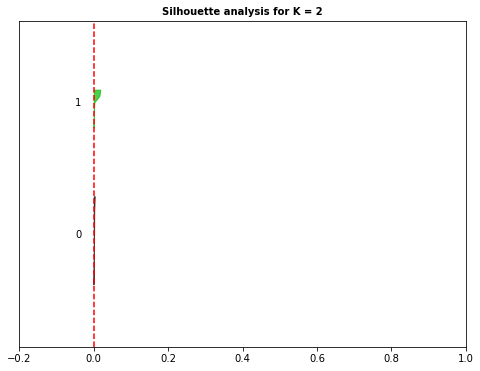

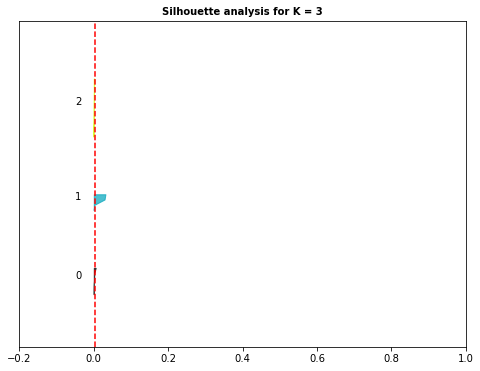

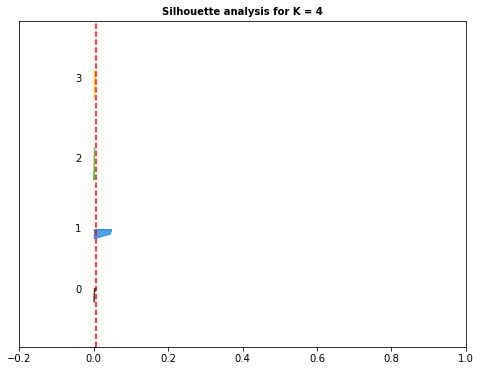

In [18]:
silhouette(kmeans_results, final_df, plot=True)

In [19]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

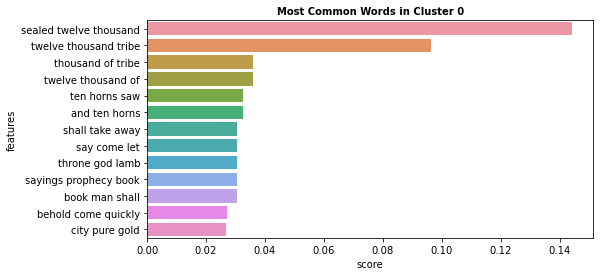

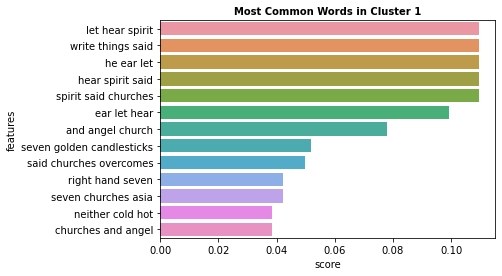

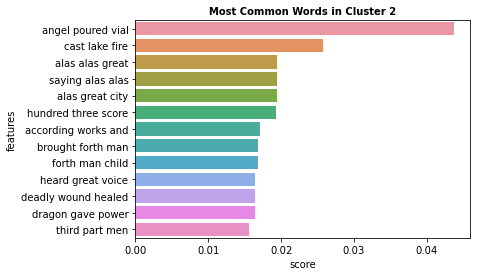

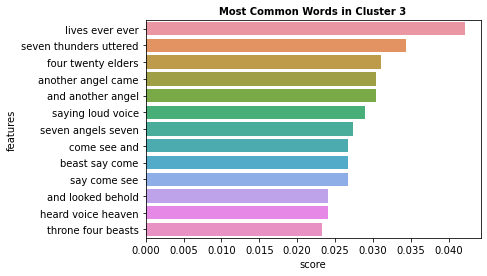

In [20]:
best_result = 4
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [21]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

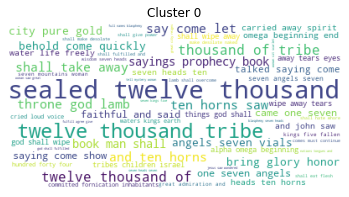

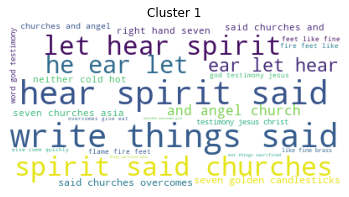

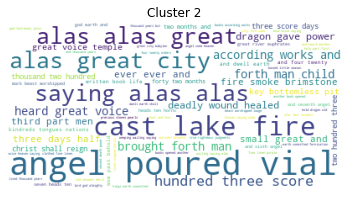

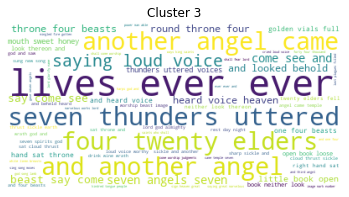

In [22]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [23]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Apocalipse_1,"'revelation', 'jesus', 'christ', ',', 'god', '...",1
101,Apocalipse_2,"'angel', 'church', 'ephesus', 'write', ';', 't...",1
102,Apocalipse_3,"'angel', 'church', 'sardis', 'write', ';', 'th...",1
103,Apocalipse_4,"'looked', ',', ',', 'behold', ',', 'door', 'op...",3
104,Apocalipse_5,"'saw', 'right', 'hand', 'sat', 'throne', 'book...",3


In [24]:
print(df)

             Autor                                              Livro  label
100   Apocalipse_1  'revelation', 'jesus', 'christ', ',', 'god', '...      1
101   Apocalipse_2  'angel', 'church', 'ephesus', 'write', ';', 't...      1
102   Apocalipse_3  'angel', 'church', 'sardis', 'write', ';', 'th...      1
103   Apocalipse_4  'looked', ',', ',', 'behold', ',', 'door', 'op...      3
104   Apocalipse_5  'saw', 'right', 'hand', 'sat', 'throne', 'book...      3
105   Apocalipse_6  'saw', 'lamb', 'opened', 'one', 'seals', ',', ...      3
106   Apocalipse_7  'things', 'saw', 'four', 'angels', 'standing',...      0
107   Apocalipse_8  'opened', 'seventh', 'seal', ',', 'silence', '...      3
108   Apocalipse_9  'fifth', 'angel', 'sounded', ',', 'saw', 'star...      2
109  Apocalipse_10  'saw', 'another', 'mighty', 'angel', 'come', '...      3
110  Apocalipse_11  'given', 'reed', 'like', 'rod', ':', 'angel', ...      2
111  Apocalipse_12  'appeared', 'great', 'wonder', 'heaven', ';', ...      2

Análise classe 1: agrupamento dos capitulos que fazem referencia a parte historica do livro

Analise classe 3: agrupamento dos capitulos que fazem alusão ao preludio dos 7 selos como sua execução, alusão aos selados (144 mil) e a consumação final dos flagelos de Deus (as taças) 

Análise classe 0: agrupamento dos capitulos que fazem ilação as recompensas dos salvos como o estabelecimento do reino de Deus e do Estado Eterno. 

Análise classe 2: agrupamento dos capitulos que fazem ilação a atuação da besta contra israel e as demais nações e a derrota do anticristo atraves do advento de Jesus e a derrota dos imperios inspirados pelo diabo com a prisão de Satanas e sua consecutiva derrota. 

Classe 0 (Apocalipse 7, 17, 21, 22)
Classe 1 (Apocalipse 1, 2, 3)
Classe 2 (Apocalipse 9, 11, 12, 13, 16, 18, 19, 20) 
Classe 3 (Apocalipse 4, 5, 6, 8, 14, 15)

4 grupos com trigrams